# WeatherPy
----

### Analysis
* The weather is warmer around the equator. I thought it was slightly interesting that the cities on my list with the highest temp were all around latitude 10.
* There does not appear to be a strong relationship between latitude and humidity.
* There does not appear to be a strong relationship between latitude and wind speed. My dataset did contain one city with a wind speed above 40 mph.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import os

now = dt.datetime.today()
strformat = now.strftime("%Y-%m-%d")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

780

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval")
print("-----------------------------")

weather_response_json = []

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_list = []
counter = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="


# div = 50
# lim = len(cities) // div
# samples = [cities[(i * div):(i * div + div)] for i in range(0, lim)]
#print(samples.index('citygroup'))
#for citygroup in samples:
#    print((samples.index(citygroup)))
#for city in range(len(cities))
# for citygroup in samples:


sets = 1
for index, city in enumerate(cities):

    #print(f"Processing Record {counter} in {samples.index(citygroup)} | {city}")
    
    print(f"Processing Record {index+1} in  set {sets} | {city}")
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    response = requests.get(query_url)
    weather_response = response.json()
    weather_response_json.append(weather_response)
    #counter = counter + 1
    if ((index+1) % 50) == 0:
        #time.sleep(3)
        sets = sets + 1
        #counter = 1

    try:
        city_list.append(weather_response['name'])
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        pass
    


Beginning Data Retrieval
-----------------------------
Processing Record 1 in  set 1 | liniere
Missing field/result... skipping.
Processing Record 2 in  set 1 | leningradskiy
Processing Record 3 in  set 1 | bredasdorp
Processing Record 4 in  set 1 | puerto ayora
Processing Record 5 in  set 1 | ayan
Processing Record 6 in  set 1 | saint george
Processing Record 7 in  set 1 | rensvik
Processing Record 8 in  set 1 | ushuaia
Processing Record 9 in  set 1 | hilo
Processing Record 10 in  set 1 | xiongshi
Missing field/result... skipping.
Processing Record 11 in  set 1 | luderitz
Processing Record 12 in  set 1 | la ronge
Processing Record 13 in  set 1 | taolanaro
Missing field/result... skipping.
Processing Record 14 in  set 1 | gizo
Processing Record 15 in  set 1 | lubao
Processing Record 16 in  set 1 | bengkulu
Missing field/result... skipping.
Processing Record 17 in  set 1 | hermanus
Processing Record 18 in  set 1 | yeppoon
Processing Record 19 in  set 1 | rikitea
Processing Record 20 in 

Processing Record 178 in  set 4 | zhezkazgan
Processing Record 179 in  set 4 | mawlaik
Processing Record 180 in  set 4 | karkaralinsk
Missing field/result... skipping.
Processing Record 181 in  set 4 | bambanglipuro
Processing Record 182 in  set 4 | shaowu
Processing Record 183 in  set 4 | pisco
Processing Record 184 in  set 4 | puerto ayacucho
Processing Record 185 in  set 4 | mtwara
Processing Record 186 in  set 4 | qaanaaq
Processing Record 187 in  set 4 | vasai
Processing Record 188 in  set 4 | kismayo
Missing field/result... skipping.
Processing Record 189 in  set 4 | beyla
Processing Record 190 in  set 4 | pimentel
Processing Record 191 in  set 4 | san patricio
Processing Record 192 in  set 4 | zhigansk
Processing Record 193 in  set 4 | gwadar
Processing Record 194 in  set 4 | iqaluit
Processing Record 195 in  set 4 | nauta
Processing Record 196 in  set 4 | clarence town
Processing Record 197 in  set 4 | vila velha
Processing Record 198 in  set 4 | ambilobe
Processing Record 199 

Processing Record 354 in  set 8 | warmbad
Processing Record 355 in  set 8 | lockhart
Processing Record 356 in  set 8 | puquio
Processing Record 357 in  set 8 | norwich
Processing Record 358 in  set 8 | rungata
Missing field/result... skipping.
Processing Record 359 in  set 8 | egvekinot
Processing Record 360 in  set 8 | sholapur
Missing field/result... skipping.
Processing Record 361 in  set 8 | tumannyy
Missing field/result... skipping.
Processing Record 362 in  set 8 | nantucket
Processing Record 363 in  set 8 | manzhouli
Processing Record 364 in  set 8 | sur
Processing Record 365 in  set 8 | amderma
Missing field/result... skipping.
Processing Record 366 in  set 8 | omboue
Processing Record 367 in  set 8 | tecpatan
Processing Record 368 in  set 8 | jalu
Processing Record 369 in  set 8 | tuy hoa
Processing Record 370 in  set 8 | gunjur
Processing Record 371 in  set 8 | kuche
Missing field/result... skipping.
Processing Record 372 in  set 8 | upernavik
Processing Record 373 in  set 8 

Processing Record 520 in  set 11 | cangzhou
Processing Record 521 in  set 11 | alice springs
Processing Record 522 in  set 11 | doha
Processing Record 523 in  set 11 | shoranur
Processing Record 524 in  set 11 | kudahuvadhoo
Processing Record 525 in  set 11 | dauphin
Processing Record 526 in  set 11 | santa rosa
Processing Record 527 in  set 11 | maryville
Processing Record 528 in  set 11 | raudeberg
Processing Record 529 in  set 11 | makinsk
Processing Record 530 in  set 11 | ipixuna
Processing Record 531 in  set 11 | phangnga
Processing Record 532 in  set 11 | natal
Processing Record 533 in  set 11 | batemans bay
Processing Record 534 in  set 11 | eyl
Processing Record 535 in  set 11 | louisbourg
Missing field/result... skipping.
Processing Record 536 in  set 11 | tsentralnyy
Missing field/result... skipping.
Processing Record 537 in  set 11 | oyem
Processing Record 538 in  set 11 | mount isa
Processing Record 539 in  set 11 | maceio
Processing Record 540 in  set 11 | rengo
Processin

Processing Record 695 in  set 14 | ballina
Processing Record 696 in  set 14 | hihifo
Missing field/result... skipping.
Processing Record 697 in  set 14 | vrede
Processing Record 698 in  set 14 | ambon
Processing Record 699 in  set 14 | cicevac
Processing Record 700 in  set 14 | chagda
Missing field/result... skipping.
Processing Record 701 in  set 15 | marystown
Processing Record 702 in  set 15 | miastko
Processing Record 703 in  set 15 | ambodifototra
Missing field/result... skipping.
Processing Record 704 in  set 15 | cumaribo
Missing field/result... skipping.
Processing Record 705 in  set 15 | burica
Missing field/result... skipping.
Processing Record 706 in  set 15 | port hueneme
Processing Record 707 in  set 15 | waddan
Processing Record 708 in  set 15 | sabirabad
Processing Record 709 in  set 15 | marakkanam
Processing Record 710 in  set 15 | sicamous
Processing Record 711 in  set 15 | novobirilyussy
Processing Record 712 in  set 15 | kattivakkam
Processing Record 713 in  set 15 

In [4]:
weather_response_json

[{'cod': '404', 'message': 'city not found'},
 {'coord': {'lon': 178.42, 'lat': 69.38},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 51.22,
   'pressure': 1018.05,
   'humidity': 64,
   'temp_min': 51.22,
   'temp_max': 51.22,
   'sea_level': 1018.05,
   'grnd_level': 1013.9},
  'wind': {'speed': 8.03, 'deg': 104.373},
  'clouds': {'all': 51},
  'dt': 1562607752,
  'sys': {'message': 0.0059, 'country': 'RU', 'sunrise': 0, 'sunset': 0},
  'timezone': 43200,
  'id': 2123814,
  'name': 'Leningradskiy',
  'cod': 200},
 {'coord': {'lon': 20.04, 'lat': -34.53},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03n'}],
  'base': 'stations',
  'main': {'temp': 64.29,
   'pressure': 1023,
   'humidity': 59,
   'temp_min': 63,
   'temp_max': 66.2},
  'wind': {'speed': 12.75, 'deg': 340},
  'clouds': {'all': 50},
  'dt': 1562607763,
  'sys': {'type

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(len(city_list))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(wind_speed))

683
683
683
683
683
683
683
683
683


In [6]:
weather_dict = {
    "City": city_list,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Leningradskiy,51,RU,1562607752,64,69.38,178.42,51.22,8.03
1,Bredasdorp,50,ZA,1562607763,59,-34.53,20.04,66.20,12.75
2,Puerto Ayora,40,EC,1562607788,61,-0.74,-90.35,80.60,18.34
3,Ayan,100,IR,1562607817,60,38.23,44.70,58.24,2.86
4,Saint George,20,GR,1562607566,26,39.45,22.34,95.00,12.75


In [7]:
outfile = "cities.csv"
outdir = '../output_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outfile)    

weather_data.to_csv(fullname, index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

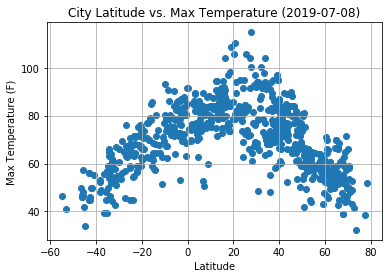

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({strformat})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_temp.png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

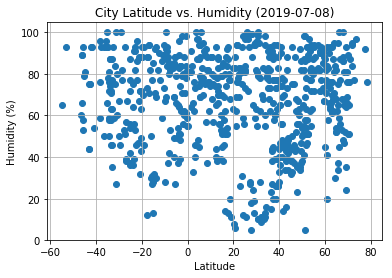

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({strformat})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

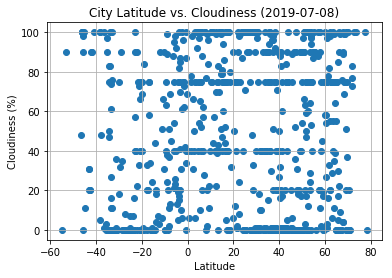

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({strformat})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

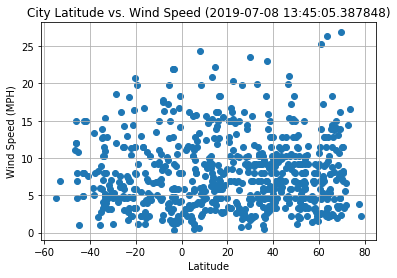

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({now})")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_vs_wind.png")

# Show plot
plt.show()